In [1]:
import numpy as np
import matplotlib.pyplot as plt


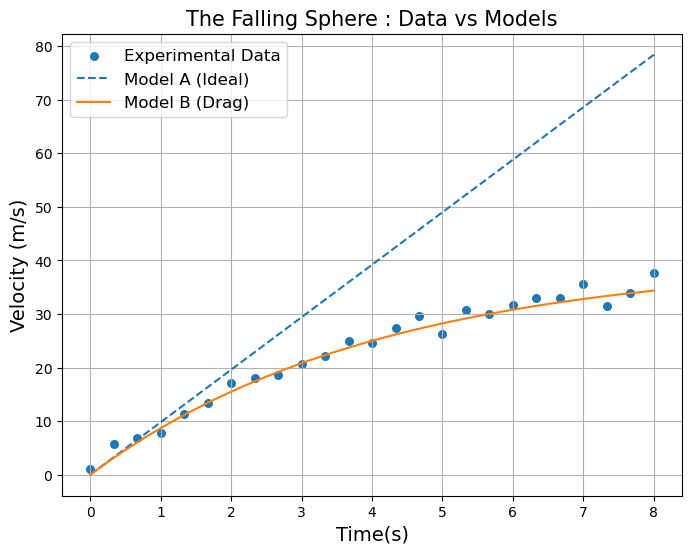

In [2]:
# Problem 1 

filename = "drop_data.csv"
data = np.loadtxt(filename, delimiter= ',', skiprows=1)

# Time and velocity
time = data[:,0]
vel = data[:,1]

# Define functions
g = 9.8 #gravity (m/s^2)
v_t = 40 # terminal velocity (m/s)

# Model A : Ideal
def model_A(t) :
    return g * t

# Model B : Drag
def model_B(t) :
    return v_t * (1- np.exp(-g * t / v_t))

# Setting values for plotting
time_model = np.linspace(0, max(time), 300)

# Begin plotting
plt.figure(figsize=(8,6))

# Exprimental data
plt.scatter(time, vel, label="Experimental Data", s=30)

# Model A
plt.plot(time_model, model_A(time_model), '--', label="Model A (Ideal)")

# Model B 
plt.plot(time_model, model_B(time_model), '-', label="Model B (Drag)")

plt.xlabel("Time(s)", fontsize=14)
plt.ylabel("Velocity (m/s)", fontsize=14)
plt.title("The Falling Sphere : Data vs Models", fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

In [3]:
# Question 1 Response : The "Ideal" model stoppe being a good representation of the real data a little right before the 2 second mark. The Ideal continuted being a constant linear line as the Drag line just started to flatten.

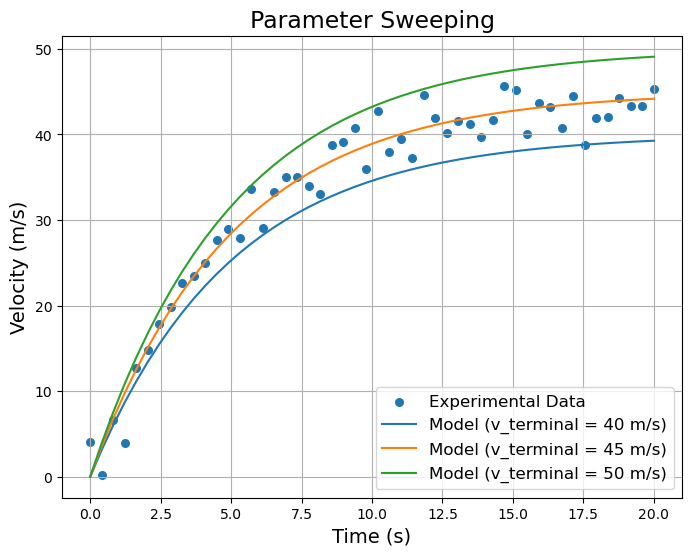

In [4]:
#Problem 2
import matplotlib.pyplot as plt
import numpy as np 

# Define the model function that predicts velocity based on terminal velocity
def velocity_model(t, v_terminal):
    """
    Simple model for velocity approaching terminal velocity
    v(t) = v_terminal * (1 - e^(-t/tau))
    where tau is a time constant (e.g., 5 seconds)
    """
    tau = 5.0  # Time constant in seconds
    return v_terminal * (1 - np.exp(-t/tau))

# Function to plot model comparison
def plot_model_comparison(t_data, v_data, v_guess, ax=None):
    """
    Plot model prediction for a given terminal velocity guess
    and compare with experimental data
    
    Parameters:
    t_data: array of time points
    v_data: array of velocity measurements
    v_guess: terminal velocity guess (m/s)
    ax: matplotlib axis object (optional)
    """
    if ax is None:
        ax = plt
    
    # Generate model predictions
    v_model = velocity_model(t_data, v_guess)
    
    # Plot the model prediction
    ax.plot(t_data, v_model, label=f"Model (v_terminal = {v_guess} m/s)")

# Create sample data (remove this in your actual code)
t_data = np.linspace(0, 20, 50)
v_data = velocity_model(t_data, 45) + np.random.normal(0, 2, size=len(t_data))  # Simulated data with noise

# Create the plot
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(t_data, v_data, s=30, label="Experimental Data")

# Plot for different terminal velocity guesses
for v_guess in [40, 45, 50]:
    plot_model_comparison(t_data, v_data, v_guess, ax=ax)

ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Velocity (m/s)", fontsize=14)
ax.set_title("Parameter Sweeping", fontsize=17)
ax.legend(fontsize=12)
ax.grid(True)
plt.show()

In [5]:
#Problem 2 Question Response : The best represented terminal velocity I could calculate was around 40 m/s. If you reduce the range of terminal velocity, the shape of the curve would bend much earlier in the graph, as opposed to a larger range of terminal velocity, which would make the curve less bendy. After trying a few more values, I figured 45 m/s gave me my best data fit and it agreed with my expectation because the graph became less bendy when I increased my terminal value range.    

In [6]:
#Problem 3
import matplotlib.pyplot as plt
import numpy as np 

spring_file = "spring_data.csv"
spring_data = np.loadtxt(spring_file, delimiter=",", skiprows=1)

m_data = spring_data[:,0] # (kg)
x_data = spring_data[:,1] # (m)

g = 9.81

def spring_model(m,k):
    """Hooke's law rearranged : x = (g/k) * m"""
    return (g/k) * m

print(f"Loaded {len(m_data)} data points from {spring_file}.")
print(f"Mass range : {m_data.min() : .3f} to {m_data.max():.3f} kg")
print(f"Displacement range: {x_data.min():.3f} to {x_data.max():.3f} m")

Loaded 15 data points from spring_data.csv.
Mass range :  0.100 to 1.500 kg
Displacement range: 0.036 to 0.596 m


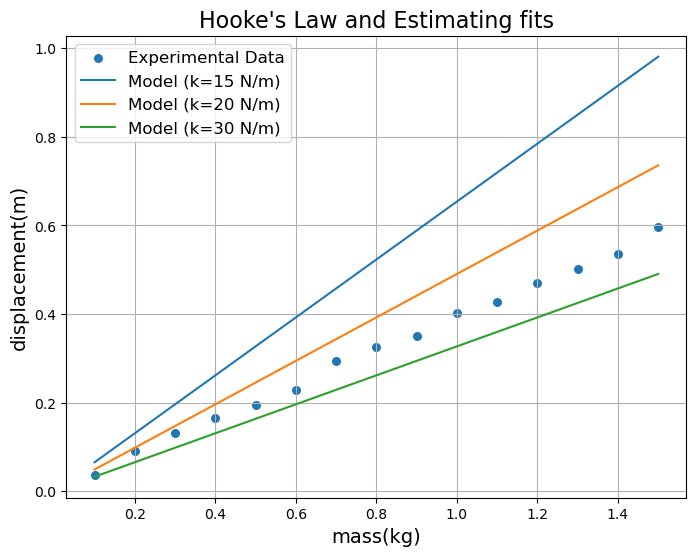

In [7]:
#Plotting 3 guesses
k_values = [15, 20, 30]

m_line = np. linspace(np.min(m_data), np.max(m_data), 300)

plt.figure(figsize=(8,6))
plt.scatter(m_data, x_data, s=30, label="Experimental Data")

for k in k_values:
    plt.plot(m_line, spring_model(m_line, k), label=f"Model (k={k} N/m)")

plt.xlabel("mass(kg)", fontsize=14)
plt.ylabel("displacement(m)", fontsize=14)
plt.title("Hooke's Law and Estimating fits", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
           
           


In [8]:
# Residuals + MSE
def k_mse(k):
    x_model = spring_model(m_data,k)
    residuals = x_data - x_model  #R = x_exp - x_model
    mse = np.mean(residuals**2)  #R^2
    return mse, residuals

print("MSE values for tested k:")
best_k = None
best_mse = None

for k in k_values:
    mse, _ = k_mse(k)
    print(f" k= {k:>5} N/m -> MSE = {mse:.8f}")
    if best_mse is None or mse < best_mse:
        best_mse = mse
        best_k = k

print(f"\nBest (lowest MSE) with tested values : k ={best_k} N/m with MSE = {best_mse : .8f}")

MSE values for tested k:
 k=    15 N/m -> MSE = 0.05636883
 k=    20 N/m -> MSE = 0.00793570
 k=    30 N/m -> MSE = 0.00369988

Best (lowest MSE) with tested values : k =30 N/m with MSE =  0.00369988


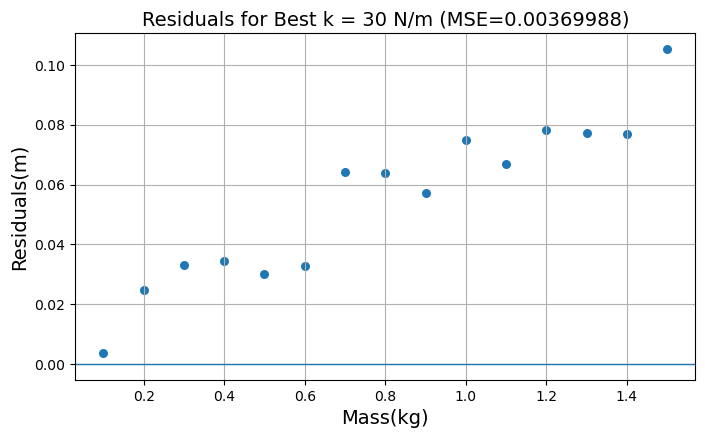

In [9]:
# Residuals for k
best_mse_val, best_residuals = k_mse(best_k)  # Fixed: Added comma between variables

plt.figure(figsize=(8,4.5))
plt.axhline(0, linewidth=1)
plt.scatter(m_data, best_residuals, s=30)
plt.xlabel("Mass(kg)", fontsize=14)
plt.ylabel("Residuals(m)", fontsize=14)
plt.title(f"Residuals for Best k = {best_k} N/m (MSE={best_mse_val:.6g})", fontsize=14) 
plt.grid(True)
plt.show() 

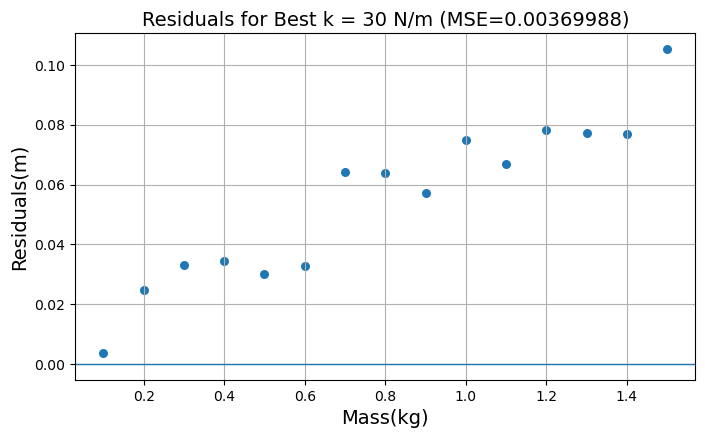

In [10]:
# Residuals for k
best_mse_val, best_residuals = k_mse(best_k)  # Fixed: Added comma between variables

plt.figure(figsize=(8,4.5))
plt.axhline(0, linewidth=1)
plt.scatter(m_data, best_residuals, s=30)
plt.xlabel("Mass(kg)", fontsize=14)
plt.ylabel("Residuals(m)", fontsize=14)
plt.title(f"Residuals for Best k = {best_k} N/m (MSE={best_mse_val:.6g})", fontsize=14) 
plt.grid(True)
plt.show() 

In [11]:
# Problem 3 Question Response : if you increase k, the slope of the line will become flatter. MSE would get larger as you move away from k. In Hookes law equation (x=(g/k)*m), we can see k in the denominator and when that denominator gets larger, it would reduce the slope/displacement.